In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df[df.isnull()].sum()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# replace min values in Glucose	BloodPressure	SkinThickness	Insulin	BMI	because the can't be zero
features=["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction"]
for i in  features:
    df[i]=df[i].replace(0,df[i].mean())

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [10]:
df.groupby(["Outcome"])["Outcome"].count()

Outcome
0    500
1    268
Name: Outcome, dtype: int64

In [11]:
#dividing dataset in independent and dependent
x= df.drop(columns = ['Outcome'])
y= df['Outcome']
x,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
 0              6    148.0           72.0      35.000000   79.799479  33.6   
 1              1     85.0           66.0      29.000000   79.799479  26.6   
 2              8    183.0           64.0      20.536458   79.799479  23.3   
 3              1     89.0           66.0      23.000000   94.000000  28.1   
 4              0    137.0           40.0      35.000000  168.000000  43.1   
 ..           ...      ...            ...            ...         ...   ...   
 763           10    101.0           76.0      48.000000  180.000000  32.9   
 764            2    122.0           70.0      27.000000   79.799479  36.8   
 765            5    121.0           72.0      23.000000  112.000000  26.2   
 766            1    126.0           60.0      20.536458   79.799479  30.1   
 767            1     93.0           70.0      31.000000   79.799479  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                      

In [12]:
#train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [13]:
x_train,y_train

(     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
 610            3    106.0      54.000000      21.000000  158.000000  30.9   
 197            3    107.0      62.000000      13.000000   48.000000  22.9   
 274           13    106.0      70.000000      20.536458   79.799479  34.2   
 195            5    158.0      84.000000      41.000000  210.000000  39.4   
 721            1    114.0      66.000000      36.000000  200.000000  38.1   
 ..           ...      ...            ...            ...         ...   ...   
 696            3    169.0      74.000000      19.000000  125.000000  29.9   
 268            0    102.0      52.000000      20.536458   79.799479  25.1   
 674            8     91.0      82.000000      20.536458   79.799479  35.6   
 206            8    196.0      76.000000      29.000000  280.000000  37.5   
 347            3    116.0      69.105469      20.536458   79.799479  23.5   
 
      DiabetesPedigreeFunction  Age  
 610                    

In [45]:
x_train.shape,x_test.shape

((576, 8), (192, 8))

<AxesSubplot: >

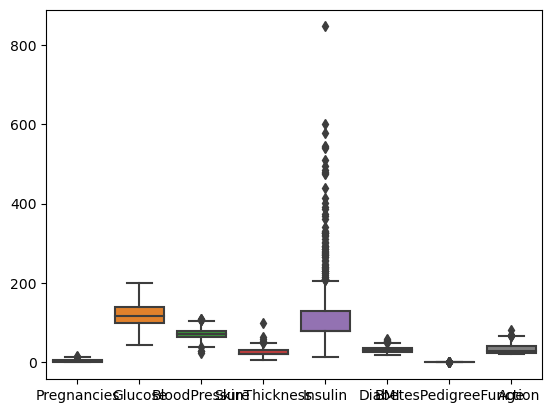

In [14]:
#standardistion for outliers
import seaborn as sns

sns.boxplot(x_train)

In [20]:
import pickle
from sklearn.preprocessing import StandardScaler
def standard_scalar(x_test,x_train):
    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(x_train)
    x_test_scaled=scaler.transform(x_test)
    #saving
    pickle.dump(scaler,open("scaler_log.pkl","wb"))
    
    return x_train_scaled,x_test_scaled

In [46]:
x_train_scaled,x_test_scaled=standard_scalar(x_test,x_train)

In [47]:
x_train_scaled.shape,x_test_scaled.shape

((576, 8), (192, 8))

<AxesSubplot: >

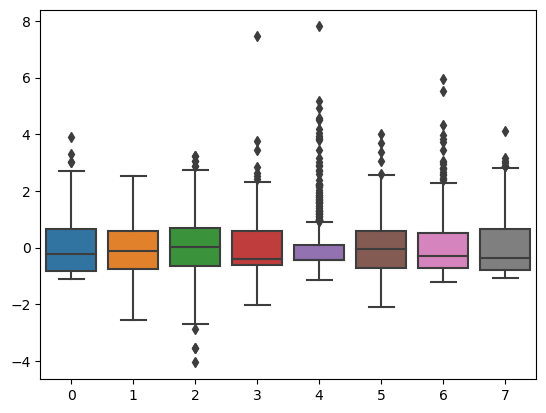

In [48]:
sns.boxplot(x_train_scaled)

In [49]:
#model training
from sklearn.linear_model import LogisticRegression

In [50]:
logreg=LogisticRegression()
logreg.fit(x_train_scaled,y_train)

LogisticRegression()

In [51]:
y_pred=logreg.predict(x_test_scaled)

In [52]:
logreg.predict_proba(x_test_scaled)

array([[0.60068683, 0.39931317],
       [0.81206191, 0.18793809],
       [0.65996451, 0.34003549],
       [0.75529807, 0.24470193],
       [0.22473827, 0.77526173],
       [0.69337141, 0.30662859],
       [0.60411316, 0.39588684],
       [0.74592963, 0.25407037],
       [0.57441191, 0.42558809],
       [0.96429708, 0.03570292],
       [0.68289747, 0.31710253],
       [0.80785496, 0.19214504],
       [0.75666938, 0.24333062],
       [0.69783114, 0.30216886],
       [0.63776492, 0.36223508],
       [0.82474671, 0.17525329],
       [0.52704257, 0.47295743],
       [0.93745939, 0.06254061],
       [0.17451109, 0.82548891],
       [0.53356713, 0.46643287],
       [0.57400969, 0.42599031],
       [0.68193035, 0.31806965],
       [0.93146609, 0.06853391],
       [0.75996278, 0.24003722],
       [0.74529626, 0.25470374],
       [0.43171019, 0.56828981],
       [0.77951426, 0.22048574],
       [0.42410517, 0.57589483],
       [0.87723669, 0.12276331],
       [0.7841633 , 0.2158367 ],
       [0.

In [53]:
#confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,accuracy_score

In [54]:
confusion_matrix(y_test,y_pred)



array([[109,  14],
       [ 31,  38]])

In [55]:
accuracy_score(y_test,y_pred)

0.765625

In [56]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.89      0.83       123\n           1       0.73      0.55      0.63        69\n\n    accuracy                           0.77       192\n   macro avg       0.75      0.72      0.73       192\nweighted avg       0.76      0.77      0.76       192\n'

In [57]:
precision_score(y_test,y_pred)

0.7307692307692307

In [58]:
recall_score(y_test,y_pred)

0.5507246376811594

In [59]:
#hyperparameter tuning

parameter={"penalty" : ['l1' 'l2', 'elasticnet',None],
           "solver" : ['liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
           'C'       : np.logspace(-3,3,7)}

from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
clf=GridSearchCV(
                logreg,
                param_grid=parameter,
                scoring='accuracy',
                cv=10
)


In [60]:
clf.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1l2', 'elasticnet', None],
                         'solver': ['liblinear', 'newton-cg', 'newton-cholesky',
                                    'sag', 'saga']},
             scoring='accuracy')

In [61]:
y_pred_clf=clf.predict(x_test_scaled)

In [62]:
clf.best_estimator_

LogisticRegression(C=0.001, penalty=None, solver='newton-cg')

In [63]:
clf.best_score_

0.763762855414398

In [64]:
accuracy_score(y_test,y_pred_clf)

0.765625

In [65]:
confusion_matrix(y_test,y_pred_clf)

array([[109,  14],
       [ 31,  38]])

In [66]:
pickle.dump(clf,open('clf.pickle','wb'))
